<a href="https://colab.research.google.com/github/btemperton/quantitative_biology_resources/blob/master/distributions/exercises/Central_Limit_Theorem_and_Continuous_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Setup - run this first
install.packages('cowplot')
library(ggplot2)
library(tidyverse)
library(cowplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



# Exercises for Understanding Continuous Distributions and Central Limit Theorem
Here, we will go through some of the R commands you can use to simulate and explore distributions. First up are the commands you need to simulate data from each of the distribution types. In `R`, these are typically called `rxxx`, where `xxx` is the type of distribution for example:

* `runif` simulates data from a uniform distribution
* `rexp` simulates data from an exponential distribution
* `rgamma` simulates data from a gamma distribution
* `rnorm` simulates data from a normal distribution

Each method takes a parameter to state how many observations we wish to simulate and then a number of other parameters depending on the parameters of the probability density function for that distribution. For example, `rnorm` takes three parameters:

1. The number of observations to simulate
2. The mean of the observations
3. The standard deviation of the observations

Let's try it out. Suppose we want to simulate ten observations from a population with a normal distribution, with a mean of 4 and a standard deviation of 2. So that our 'random' numbers are the same each time you run this, we can set a seed value for random number generation using the `set.seed` method. The seed can be any number, but setting it before simulating populations is critical if you want your work to be reproducible by others!

In [9]:
set.seed(14)
values = rnorm(10, mean=4, sd=2)
print(values)

 [1] 2.676300 7.437908 8.243334 6.994307 3.927719 6.463890 3.870238 6.137987
 [9] 3.246069 6.086366


You can see that it has randomly generated 10 real numbers (because the normal distribution is continuous). We can double-check the mean and standard deviation:

In [10]:
print(paste('The mean of values is:', mean(values)))
print(paste('The standard deviation of values is:', sd(values)))

[1] "The mean of values is: 5.50841207034475"
[1] "The standard deviation of values is: 1.92570992477481"


Well, it looks like our mean of 5.51 is a bit higher than the value of 5 we used to simulate the data. **Why do you think this is?** _(hint, try simulating 100 values below and see what you get)_

In [0]:
# Simulate a normal distribution of 100 values, with a mean of 4
# a standard deviation of 2 here, then print the mean and standard deviation
# of the simulated data

# Testing the Central Limit Theorem

Here, we are going to simulate a population of 1 million with a uniform distribution going from 1 to 10. We are then going to randomly sample five observations from that population and calculate the mean:

In [14]:
#simulate the observations
population = runif(1e6, min=1, max=10)

#subsample 10 observations
subsample = sample(population, size=10, replace=TRUE)
print(subsample)
print(paste('The mean of this subsample is:', mean(subsample)))

 [1] 9.797611 1.254923 6.376273 2.244952 3.041275 3.456914 7.352730 2.681192
 [9] 8.132002 6.596608
[1] "The mean of this subsample is: 5.09344799616374"


Notice here that we selected `replace=TRUE`. This is known as **sampling with replacement**, i.e. the number is selected from the population, and then placed back in the population so that it might be selected randomly again. The opposite, where `replace=FALSE` means that the number can _only be selected once_. Thus, the first randomly selected observation will be chosen from one million numbers, the second will be chosen from 999,999 numbers etc. When subsampling your data, particularly if you are doing so to infer properties of the whole population, it is important to sample _with replacement_.

Now we have one subsample, we can follow a similar pattern to repeat this lots of times with a `for` loop and store these values in a vector. Let's take 100 subsamples, calculate their means and then store the mean in a vector called `subsampled_means`.

In [33]:
#set up the storage vector
subsampled_means = rep(0, times=100)

#Loop through and set the values 
for (i in 1:length(subsampled_means)){
    subsample = sample(population, size=10, replace=TRUE)
    subsampled_means[i] = mean(subsample)
}

print('The first five records of our subsample are:')
print(subsampled_means[1:5])

[1] "The first five records of our subsample are:"
[1] 4.929482 6.823925 4.167082 6.385861 6.003073


Now let's plot these values

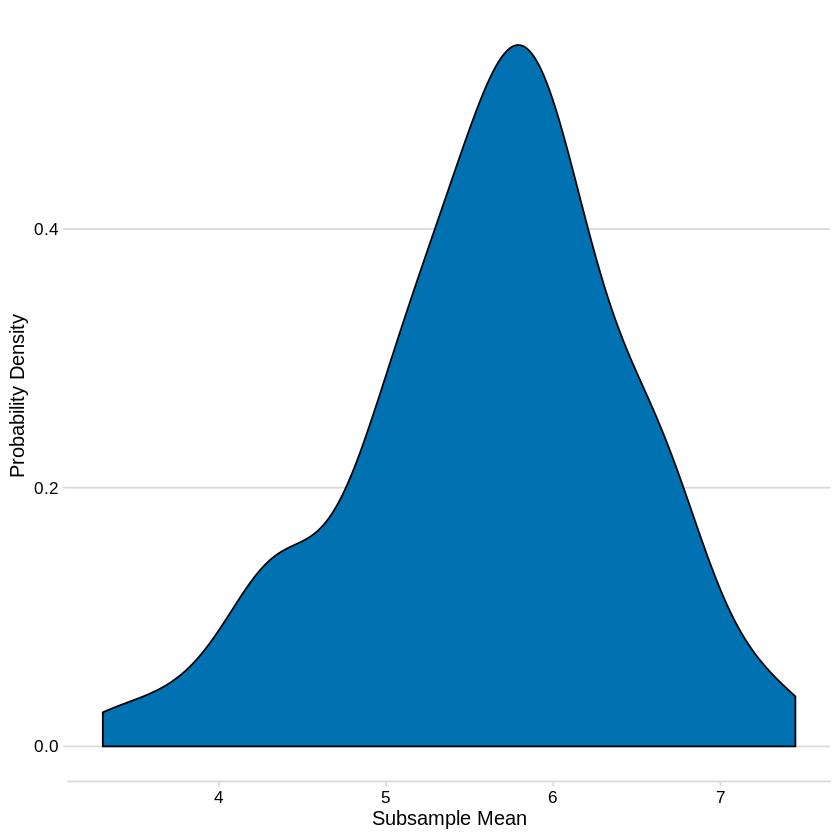

In [27]:
ggplot(tibble(x=subsampled_means), aes(x)) +
    geom_density(fill='#0072B2') +
    theme_minimal_hgrid(12) +
    scale_x_continuous(name="Subsample Mean") +
    scale_y_continuous(name='Probability Density')

Well, it looks a bit wonky for a normal distribution, and the ends are cut off. We can fix the latter problem by using a histogram instead of a density plot:

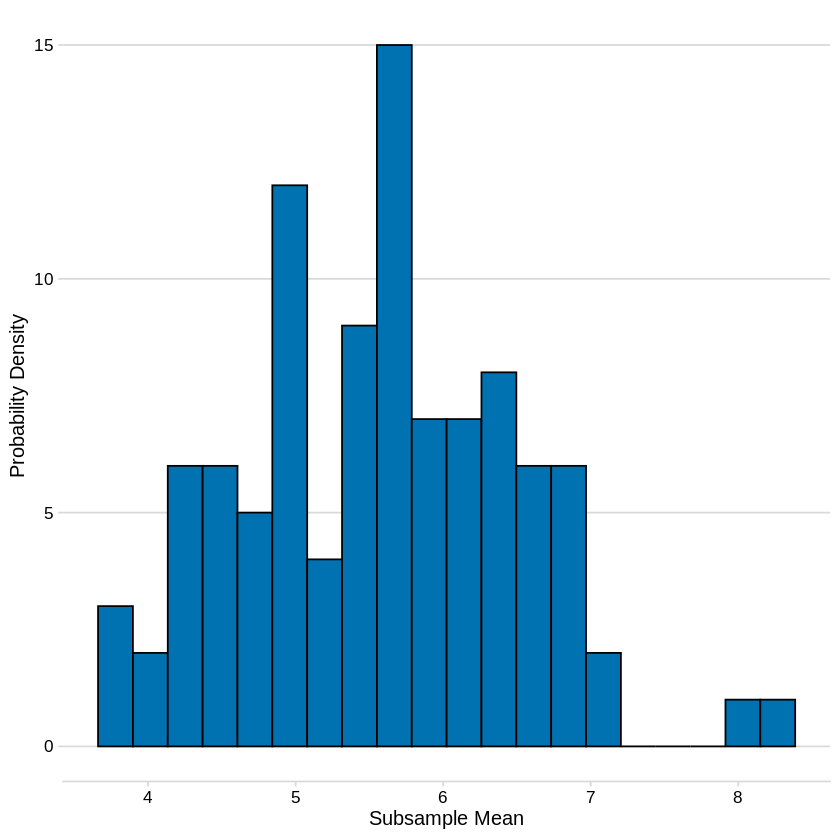

In [34]:
ggplot(tibble(x=subsampled_means), aes(x)) +
    geom_histogram(fill='#0072B2', bins=20, color='black') +
    theme_minimal_hgrid(12) +
    scale_x_continuous(name="Subsample Mean") +
    scale_y_continuous(name='Probability Density')

Still wonky though... **How might you fix this to make it look more like a normal distribution?** Do so below:

With your new and improved `subsampled_means`, we can work out the 95% confidence intervals by using the `quantile` function. This function takes a vector of values and a vector of the quantiles you wish to calculate. For 95% confidence, we are interested in all the values that sit between a quantile of 2.5% and 97.5%.

In [48]:
ci95 = quantile(subsampled_means, c(0.025, 0.975))
print(ci95)
sprintf('We can be 95%% confident that the mean of our population can be found between the values %1.2f and %1.2f', ci95[1], ci95[2])

    2.5%    97.5% 
3.910804 7.013538 


[1] "We can be 95% confident that the mean of our population can be found between the values 3.91 and 7.01"

**How might we improve that confidence (i.e. make it a narrower distribution)?**. Try your answer below: